In [ ]:
Mushroom Classification

In [1]:
import pandas as pd


# CSV dosyasını oku
df = pd.read_csv('mushroom.csv')

# İlk birkaç satırı göster
df.head()


,class=e,class=p,cap-shape=b,cap-shape=c,cap-shape=f,cap-shape=k,cap-shape=s,cap-shape=x,cap-surface=f,cap-surface=g,...,population=s,population=v,population=y,habitat=d,habitat=g,habitat=l,habitat=m,habitat=p,habitat=u,habitat=w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


## 1. Hedef Değişkeni Belirleyelim

In [2]:
df['target'] = df['class=p']  # Zehirli olanlar 1, yenilebilir olanlar 0
X = df.drop(['class=e', 'class=p', 'target'], axis=1)
y = df['target']


## 2. Veriyi Eğitim ve Test Olarak Ayır

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 3. Model Eğitimi (Örnek: Karar Ağacı)

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Doğruluk:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Doğruluk: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



##  Karar Ağacını Görselleştirme

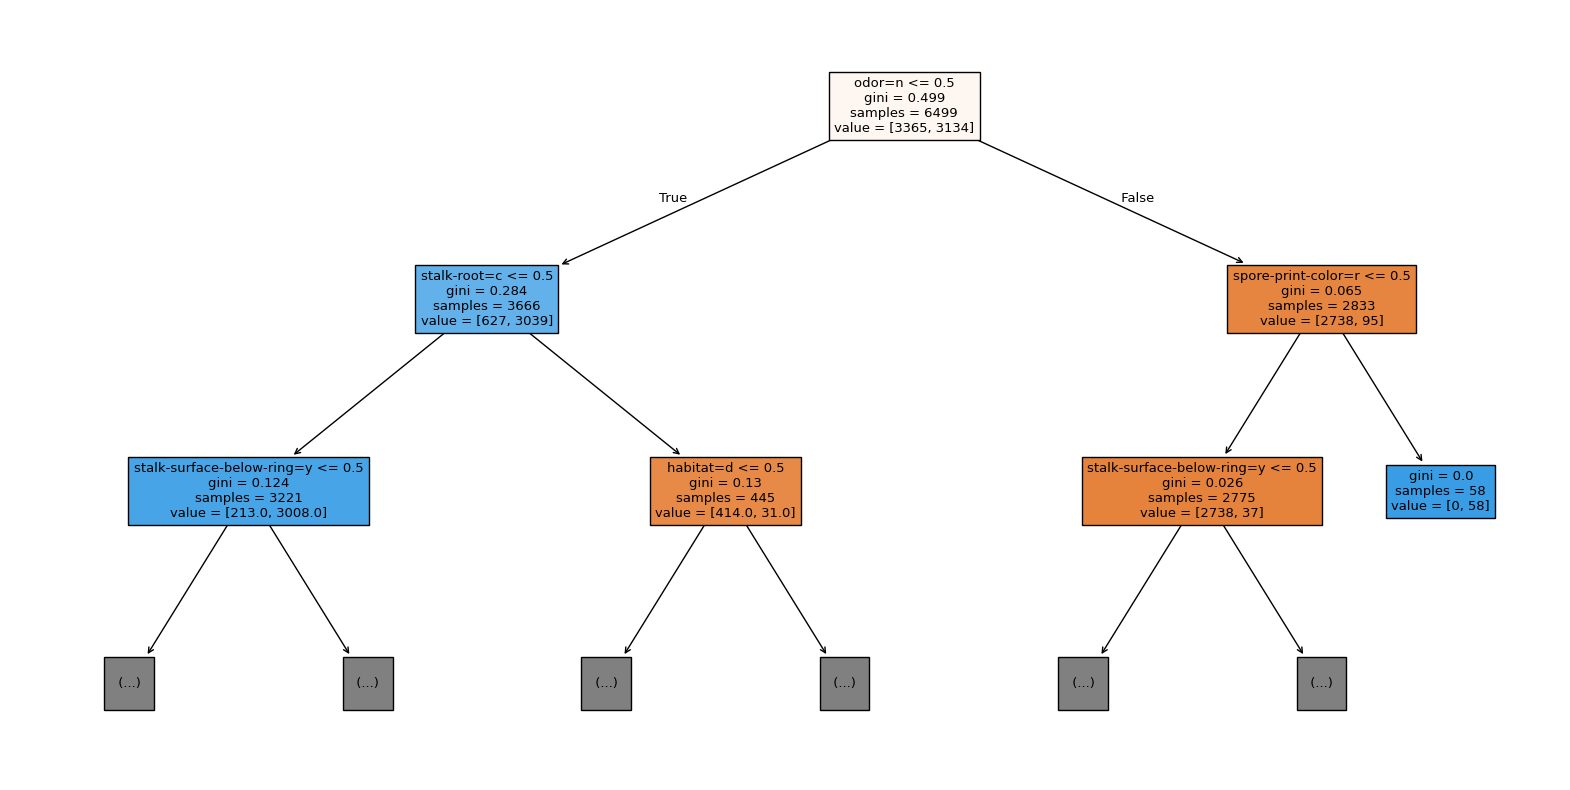

In [5]:
#Modelin nasıl karar verdiğini anlamak için:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, max_depth=2, feature_names=X.columns)
plt.show()


## Çapraz Doğrulama (Cross Validation)

In [6]:
# Modelin genellenebilirliğini ölçmek için
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y, cv=5)
print("5 Katlı Çapraz Doğrulama Ortalaması:", scores.mean())

5 Katlı Çapraz Doğrulama Ortalaması: 0.966256612353164


## Önemli Özellikleri Görmek (Feature Importance)

In [7]:
import numpy as np

importances = clf.feature_importances_
indices = np.argsort(importances)[-10:]  # en önemli 10 özelliği al

for i in reversed(indices):
    print(f"{X.columns[i]}: {importances[i]:.4f}")


odor=n: 0.6231
stalk-root=c: 0.1800
stalk-surface-below-ring=y: 0.0936
spore-print-color=r: 0.0341
odor=a: 0.0208
odor=l: 0.0207
habitat=d: 0.0178
stalk-color-above-ring=n: 0.0056
cap-surface=g: 0.0018
population=c: 0.0018


 ## En Önemli 10 Özellik

## Yorum
### Özellikle odor=n (koku yok) özelliği, zehirli/yenilebilir ayrımında açık ara en belirleyici özellik.

### stalk-root, spore-print-color, habitat, cap-surface gibi morfolojik özellikler de etkili ama daha az derecede.



In [1]:
import pandas as pd

df = pd.read_csv("mushroom.csv")
print(df.columns)

Index(['class=e', 'class=p', 'cap-shape=b', 'cap-shape=c', 'cap-shape=f',
       'cap-shape=k', 'cap-shape=s', 'cap-shape=x', 'cap-surface=f',
       'cap-surface=g',
       ...
       'population=s', 'population=v', 'population=y', 'habitat=d',
       'habitat=g', 'habitat=l', 'habitat=m', 'habitat=p', 'habitat=u',
       'habitat=w'],
      dtype='object', length=119)
